In [1]:
import os
import subprocess

def git_repo_root():
    # Run the 'git rev-parse --show-toplevel' command to get the root directory of the Git repository
    try:
        root = subprocess.check_output(['git', 'rev-parse', '--show-toplevel'], universal_newlines=True).strip()
        return root
    except subprocess.CalledProcessError:
        # Handle the case where the current directory is not inside a Git repository
        return None

# Get the root directory of the Git repository
git_root = git_repo_root()

if git_root:
    # Change the working directory to the root of the Git repository
    os.chdir(git_root)
    print(f"Changed working directory to: {git_root}")
else:
    print("Not inside a Git repository.")

Changed working directory to: /home/tomas/Documents/git/2dDiffusion


In [1]:
from diffusion import VPSDE
import torchvision
from matplotlib import pyplot as plt
import torchvision.transforms as transforms
from denoising_diffusion_pytorch import Unet
from diffusion import VPSDE
from torch.utils.data import DataLoader
from torch.optim import Adam
from training import train_score_network_mnist
import torch
from guided_diffusion import Net

In [2]:
device = 'cuda'
data = 'MNIST'
model = Unet(channels = 1, dim = 32).to(device)
model.load_state_dict(torch.load('./models/MNIST/epoch49'))
sde = VPSDE(100, 0.1, 20, device = device)

''' hyper params'''
n_epochs =   50
batch_size =  32
lr=1e-4
optimizer = Adam(model.parameters(), lr=lr)

In [3]:
def plot(score_net):
  with torch.no_grad():
    samples = sde.backward_diffusion(score_net, data_shape = (5, 1, 32, 32)).detach().cpu().numpy()
  samples = samples.swapaxes(1,2)
  samples = samples.swapaxes(2,3)
  fig, axe = plt.subplots(5)
  for i in range(5):
      axe[i].imshow(samples[i])
  plt.show()

/content/diffusion.py:129: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = x - (drift - (diffusion**2)*score )*dt + diffusion * torch.sqrt(torch.tensor(dt)) * torch.randn_like(x)


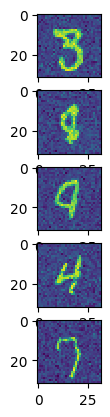

In [4]:
plot(model)

In [3]:
classifier = Net().to(device)
classifier.load_state_dict(torch.load('./models/MNISTClassifier/epoch99'))

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


<All keys matched successfully>

In [4]:
def get_numbers(score_net, classifier, batch_size, number):

  samples = sde.classifier_guided_backward_diffusion(score_net, classifier, data_shape = (batch_size, 1, 32, 32),
                                     classes = torch.Tensor([number]*batch_size).to(torch.int64).to(device)).detach().cpu().numpy()

  return samples

def plot(score_net, classifier):

  fig, axe = plt.subplots(3, 10)

  for i in range(10):
    axe[0][i].set_title(f'{i}')
    samples = get_numbers(score_net, classifier, 3, i)
    for j in range(3):
      axe[j, i].imshow(samples[j][0], cmap = 'gray', vmin=0, vmax=1)
      axe[j, i].axis('off')

  plt.tight_layout(pad=0.1)
  plt.show()

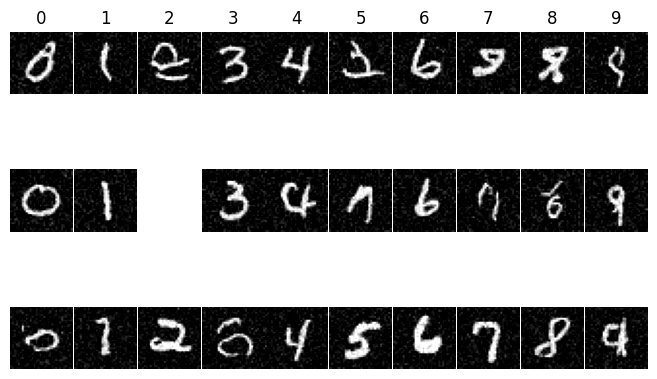

In [19]:
plot(model, classifier)

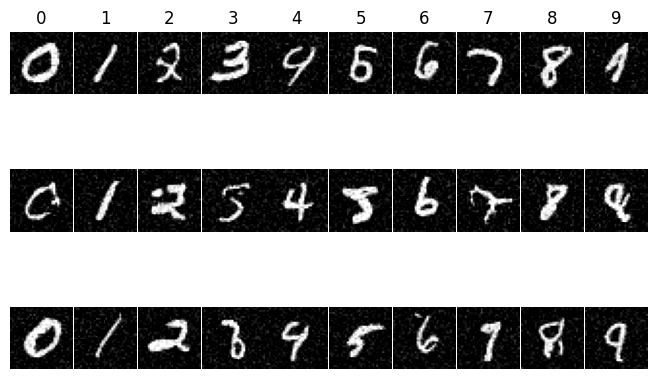

In [20]:
plot(model, classifier)

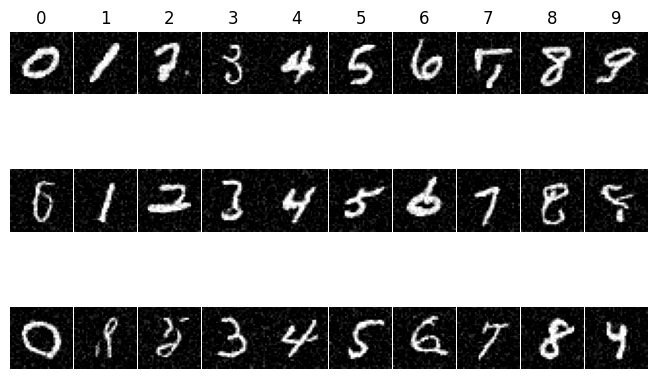

In [9]:
plot(model, classifier)

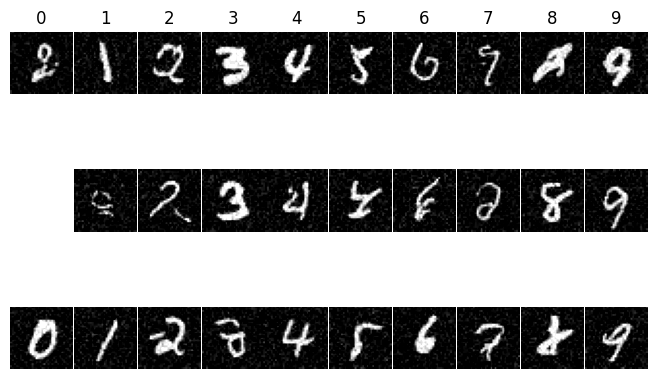

In [32]:
plot(model, classifier)

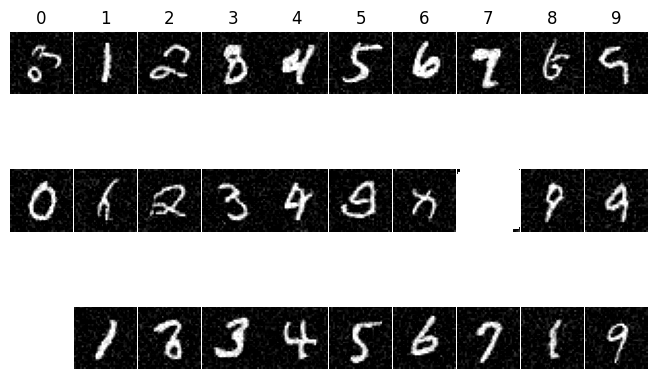

In [35]:
plot(model, classifier)

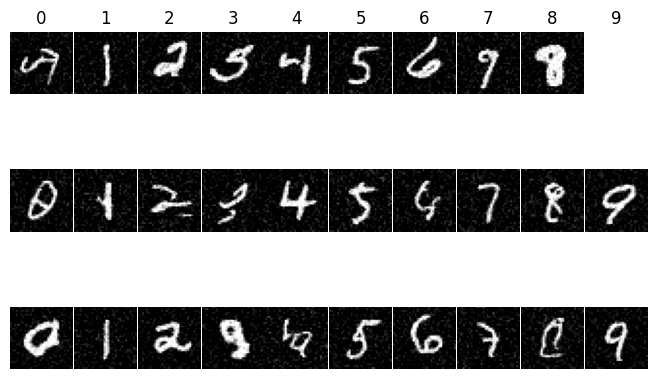

In [40]:
plot(model, classifier)